In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


In [3]:
# Lấy địa chỉ thư mục chứa dữ liệu đã được reformatted
current_directory = os.getcwd()
folder_path = os.path.join(current_directory,'../../data/reformatted_data')

# Tạo df
df = pd.read_csv(f'{folder_path}/non_pre_processed_data.csv')
df.to_csv(f'{folder_path}/EDA.csv')
df['ar3'] = df['ar3'].apply(lambda x: round(x,2))
 


In [4]:
df

,student_id,gender,age,gpa1,gpa2,gpa3,gpa4,ar1,ar2,ar3,ar4,drop_out
0,1900006098,1,23,1.3,3.4,1.3,2.4,34.5,12.0,0.0,53.0,1
1,1900007549,0,23,3.3,0.4,3.1,2.7,100.0,48.0,76.0,90.0,1
2,1900007763,1,23,7.0,6.1,3.8,3.5,0.0,18.1,2.3,17.2,0
3,1900007784,1,23,9.2,9.4,6.9,7.5,15.0,2.2,16.1,8.9,0
4,1900008106,1,23,4.7,7.7,3.1,7.2,7.7,0.0,19.1,7.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...
320,2200011621,1,20,5.4,2.7,4.8,5.3,14.4,40.0,17.9,12.3,0
321,2200011643,1,23,3.8,8.0,7.8,6.4,16.8,0.0,3.7,0.0,0
322,2200011704,1,20,9.3,7.3,7.7,5.4,10.8,10.0,0.4,15.8,0
323,2200011866,0,21,6.2,4.7,6.4,8.3,4.0,11.5,14.5,0.0,0


In [5]:
X = df[df.columns[:-1]]
y = df['drop_out']

# Initialize SMOTE
smote = SMOTE(random_state=42)
# Apply oversampling
X_resampled, y_resampled = smote.fit_resample(X, y)
df = pd.concat([X_resampled, y_resampled],axis=1)
df

,student_id,gender,age,gpa1,gpa2,gpa3,gpa4,ar1,ar2,ar3,ar4,drop_out
0,1900006098,1,23,1.300000,3.400000,1.300000,2.400000,34.500000,12.000000,0.000000,53.000000,1
1,1900007549,0,23,3.300000,0.400000,3.100000,2.700000,100.000000,48.000000,76.000000,90.000000,1
2,1900007763,1,23,7.000000,6.100000,3.800000,3.500000,0.000000,18.100000,2.300000,17.200000,0
3,1900007784,1,23,9.200000,9.400000,6.900000,7.500000,15.000000,2.200000,16.100000,8.900000,0
4,1900008106,1,23,4.700000,7.700000,3.100000,7.200000,7.700000,0.000000,19.100000,7.900000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
627,2000001163,0,22,2.835956,1.698504,1.845319,1.518726,58.584203,48.220907,58.670354,39.861349,1
628,2094368657,1,21,3.149262,0.967651,2.178926,0.729664,7.931526,6.685216,3.409387,23.768449,1
629,2000002180,0,22,2.427056,0.505833,1.970555,1.897084,95.562894,85.400561,92.294448,85.188334,1
630,2000004451,0,22,2.318710,1.725802,3.163222,2.750321,65.045257,65.612970,39.722731,52.671059,1


In [6]:
df['drop_out'].isnull().sum()

0

In [7]:
df.columns

Index(['student_id', 'gender', 'age', 'gpa1', 'gpa2', 'gpa3', 'gpa4', 'ar1',
       'ar2', 'ar3', 'ar4', 'drop_out'],
      dtype='object')

### Biến phân loại:
+ 'student_id'
+ 'gender'
+ 'drop_out' (thôi học)
### Biến số:
+ 'age'
+ 'gpa1', 'gpa2', 'gpa3', 'gpa4' (điểm trung bình học kỳ 1, 2, 3, 4)
+ 'ar1', 'ar2', 'ar3', 'ar4' (tỉ lệ vắng học học kỳ 1, 2, 3, 4)


# Kiểm tra dữ liệu thiếu

In [8]:
df.isnull().sum()

student_id    0
gender        0
age           0
gpa1          0
gpa2          0
gpa3          0
gpa4          0
ar1           0
ar2           0
ar3           0
ar4           0
drop_out      0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 632 entries, 0 to 631
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   student_id  632 non-null    int64  
 1   gender      632 non-null    int64  
 2   age         632 non-null    int64  
 3   gpa1        632 non-null    float64
 4   gpa2        632 non-null    float64
 5   gpa3        632 non-null    float64
 6   gpa4        632 non-null    float64
 7   ar1         632 non-null    float64
 8   ar2         632 non-null    float64
 9   ar3         632 non-null    float64
 10  ar4         632 non-null    float64
 11  drop_out    632 non-null    int64  
dtypes: float64(8), int64(4)
memory usage: 59.4 KB


## Kiểm tra dữ liệu trùng

In [10]:
duplicated_id_pairs = df.duplicated(subset=['student_id'], keep=False)
duplicated_id_pairs[duplicated_id_pairs==True]

201    True
518    True
dtype: bool

In [11]:
df[df.duplicated(subset=['student_id'], keep=False)==True]

,student_id,gender,age,gpa1,gpa2,gpa3,gpa4,ar1,ar2,ar3,ar4,drop_out
201,2200002438,0,20,3.60000,6.600000,4.400000,8.100000,16.100000,0.000000,17.600000,0.000000,0
518,2200002438,1,20,2.07603,1.554963,1.087711,2.743281,45.631337,41.243757,48.929779,66.450369,1


In [12]:
df.drop(index = 518, inplace = True)

In [13]:
df[df.duplicated(subset=['student_id'], keep=False)==True]

,student_id,gender,age,gpa1,gpa2,gpa3,gpa4,ar1,ar2,ar3,ar4,drop_out


## Thống kê mô tả

In [14]:
df.iloc[:,2:-1].describe()

,age,gpa1,gpa2,gpa3,gpa4,ar1,ar2,ar3,ar4
count,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000
mean,21.353407,4.560250,4.533376,4.585049,4.512567,34.410077,26.287923,27.988399,32.096318
std,1.128414,2.606587,3.075920,2.596584,2.881711,31.380974,26.245691,28.163311,30.817633
min,20.000000,1.000000,0.100000,0.400000,0.600000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.510139,1.851195,2.204887,1.981249,8.650000,1.650000,4.522927,2.650000
50%,21.000000,3.200000,3.271018,3.605540,3.200000,18.900000,18.090951,15.850000,22.500000
75%,22.000000,6.800000,7.500000,7.000000,7.200000,58.070340,48.988686,49.008491,59.004245
max,26.000000,10.000000,10.000000,10.000000,10.000000,100.000000,90.000000,95.000000,100.000000


## Chuyển đổi kiểu dữ liệu

In [15]:
df.dtypes

student_id      int64
gender          int64
age             int64
gpa1          float64
gpa2          float64
gpa3          float64
gpa4          float64
ar1           float64
ar2           float64
ar3           float64
ar4           float64
drop_out        int64
dtype: object

In [16]:
df['student_id'] = df['student_id'].astype(str)
df.dtypes

student_id     object
gender          int64
age             int64
gpa1          float64
gpa2          float64
gpa3          float64
gpa4          float64
ar1           float64
ar2           float64
ar3           float64
ar4           float64
drop_out        int64
dtype: object

## Kiếm tra biến phân loại student_id

In [17]:
df['student_id'] = df['student_id'].astype(str)
check = df['student_id'].str.isalpha()
check[check]

Series([], Name: student_id, dtype: bool)

## Kiếm tra biến phân loại gender

In [18]:
check = df['gender'].astype(str).str.isalpha()
check[check]

Series([], Name: gender, dtype: bool)

In [19]:
df['gender'].unique()

array([1, 0], dtype=int64)

## Kiêm tra biến phân loại age

In [20]:
check = df['age'].astype(str).str.isalpha()
print(df['age'].dtype)
df['age'] = df['age'].astype('int8')
print("Kiểu dữ liệu sau khi chuyển đổi: ",df['age'].dtype)
check[check]

int64
Kiểu dữ liệu sau khi chuyển đổi:  int8


Series([], Name: age, dtype: bool)

In [21]:
df['drop_out'].unique()

array([1, 0], dtype=int64)

## Mã hóa biến phân loại student_id bằng phương pháp LabelEncoder

Phương pháp label encoder
+ Chuyển đổi các biến phân loại thành các số nguyên duy nhất.
+ Label Encoder thích hợp cho các biến phân loại không có mối quan hệ thứ bậc giữa các giá trị, nghĩa là không có thứ tự hoặc mức độ quan trọng giữa các giá trị

In [22]:
le = LabelEncoder()
df['student_id_'] = le.fit_transform(df['student_id'])

## Chuẩn hóa dữ liệu

Mục tiêu: Đưa các biến về cùng 1 thang đo

Giữ cho phân phối của chúng có trung bình xấp xỉ 0 và độ lệch chuẩn xấp xỉ 1, (giảm biến động của dữ liệu   )

In [23]:
print('Độ xiên: \n',df.iloc[:, 2:-2].skew())
print('Độ nhọn: \n',df.iloc[:, 2:-2].kurtosis())


Độ xiên: 
 age     0.350922
gpa1    0.681059
gpa2    0.226093
gpa3    0.318890
gpa4    0.305924
ar1     0.703999
ar2     0.679736
ar3     0.869261
ar4     0.519975
dtype: float64
Độ nhọn: 
 age    -0.485691
gpa1   -0.947550
gpa2   -1.446895
gpa3   -1.295024
gpa4   -1.437240
ar1    -0.819191
ar2    -0.771266
ar3    -0.558718
ar4    -1.208459
dtype: float64


In [24]:
from scipy.stats import shapiro

# Đầu vào: mẫu dữ liệu (array-like)
# Ví dụ: data là một mảng chứa dữ liệu cần kiểm tra
# data = [1, 2, 3, 4, 5, ...]

# Thực hiện kiểm tra Shapiro-Wilk
statistic, p_value = shapiro(df.iloc[:, 2:-2].values)

# In kết quả
print("Statistic:", statistic)
print("p-value:", p_value)

# Kiểm tra giả thuyết
alpha = 0.05
if p_value > alpha:
    print("Không thể bác bỏ giả thuyết không: Dữ liệu có thể tuân theo phân phối chuẩn.")
else:
    print("Bác bỏ giả thuyết không: Dữ liệu không tuân theo phân phối chuẩn.")


Statistic: 0.7297764005790714
p-value: 3.394614070166124e-70
Bác bỏ giả thuyết không: Dữ liệu không tuân theo phân phối chuẩn.


c:\Users\ptqdu\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5679.
  res = hypotest_fun_out(*samples, **kwds)


In [25]:
# Chuyển đổi các biến về cùng 1 thang đo bằng z score
# features = df.iloc[:, 1:].columns
# scaler = StandardScaler()
# df[features] = scaler.fit_transform(df[features])
# data = df.iloc[:, 3:]
# data

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df.iloc[:, 2:-2].values)
scaled_data

data = pd.DataFrame(scaled_data, columns = ['age', 'gpa1','gpa2','gp3', 'gp4','ar1', 'ar2', 'ar3', 'ar4'])
data

,age,gpa1,gpa2,gp3,gp4,ar1,ar2,ar3,ar4
0,0.500000,0.033333,0.333333,0.093750,0.191489,0.345000,0.133333,0.000000,0.530000
1,0.500000,0.255556,0.030303,0.281250,0.223404,1.000000,0.533333,0.800000,0.900000
2,0.500000,0.666667,0.606061,0.354167,0.308511,0.000000,0.201111,0.024211,0.172000
3,0.500000,0.911111,0.939394,0.677083,0.734043,0.150000,0.024444,0.169474,0.089000
4,0.500000,0.411111,0.767677,0.281250,0.702128,0.077000,0.000000,0.201053,0.079000
...,...,...,...,...,...,...,...,...,...
626,0.333333,0.203995,0.161465,0.150554,0.097737,0.585842,0.535788,0.617583,0.398613
627,0.166667,0.238807,0.087641,0.185305,0.013794,0.079315,0.074280,0.035888,0.237684
628,0.333333,0.158562,0.040993,0.163600,0.137988,0.955629,0.948895,0.971521,0.851883
629,0.333333,0.146523,0.164222,0.287836,0.228758,0.650453,0.729033,0.418134,0.526711


## Giảm chiều dữ liệu. (PCA)

In [27]:
## Danh sách các features
nb_features = data.shape[1]
features = data.columns[:-2]
print(nb_features)
print('Các features:', ', '.join(features))

9
Các features: age, gpa1, gpa2, gp3, gp4, ar1, ar2


In [28]:
pca = PCA().fit(data)  
## Phương sai trên từng chiều (phương sai đo lường mức độ phân tán của các điểm dữ liệu quanh giá trị trung bình)
print(pca.explained_variance_.flatten())

[0.56368067 0.06222012 0.03375392 0.0263912  0.0200224  0.0176188
 0.01075728 0.00863757 0.00621898]


## Chọn k
k là eig vectors có eig values lớn nhất.

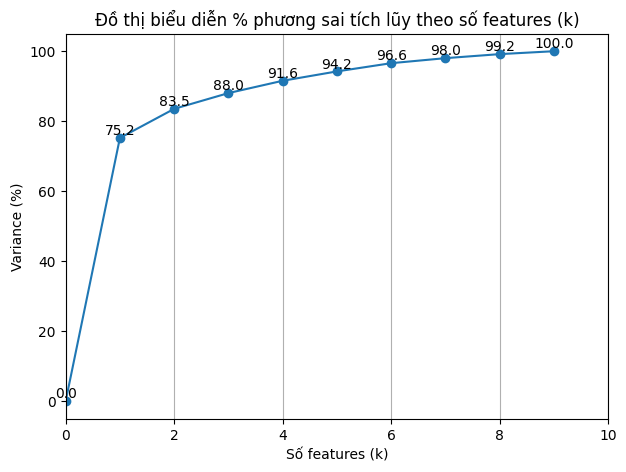

In [29]:
# Các điểm dữ liệu
points = np.cumsum(pca.explained_variance_ratio_) * 100
points = np.insert(points, 0, 0) # Thêm điểm k = 0, variance = 0
x_i = np.arange(0, nb_features + 1)
y_i = (points[-nb_features-1:])//0.01/100  # Corrected calculation of y_i

plt.figure(figsize = (7, 5))
plt.plot(points, marker = 'o')
plt.xlabel('Số features (k)')
plt.ylabel('Variance (%)')  
plt.title('Đồ thị biểu diễn % phương sai tích lũy theo số features (k)')
plt.xlim([0, nb_features + 1])
plt.grid(axis = 'x')
for i in x_i:
    plt.text(i, y_i[i] + 1, round(y_i[i], 1), ha = 'center', va = 'baseline')
    # tung độ của text cao hơn point 1 đơn vị

plt.show()


In [30]:
## Kiểm chứng: Tính phương sai tích lũy theo giá trị của k
var = 0.0
for k in range(1, nb_features + 1):
    pca = PCA(k)
    pca.fit(data)

    #Tính tổng phương sai tích lũy
    newVar = pca.explained_variance_ratio_.sum() * 100
    print('   * k = %2d' %k, ': phương sai tích lũy ~ %.1f%%' %newVar,
          '--> tăng ~ %.1f%%' %(newVar - var))
    var = newVar

   * k =  1 : phương sai tích lũy ~ 75.2% --> tăng ~ 75.2%
   * k =  2 : phương sai tích lũy ~ 83.5% --> tăng ~ 8.3%
   * k =  3 : phương sai tích lũy ~ 88.0% --> tăng ~ 4.5%
   * k =  4 : phương sai tích lũy ~ 91.6% --> tăng ~ 3.5%
   * k =  5 : phương sai tích lũy ~ 94.2% --> tăng ~ 2.7%
   * k =  6 : phương sai tích lũy ~ 96.6% --> tăng ~ 2.4%
   * k =  7 : phương sai tích lũy ~ 98.0% --> tăng ~ 1.4%
   * k =  8 : phương sai tích lũy ~ 99.2% --> tăng ~ 1.2%
   * k =  9 : phương sai tích lũy ~ 100.0% --> tăng ~ 0.8%


### Nhận xét: 
Khi tăng từ k=1 đến k=2, phương sai tích lũy tăng khoảng 11.9%, đây là một sự tăng đáng kể.

Tuy nhiên, sau khi tăng từ k=2 đến k=3, mức tăng giảm xuống còn 10.6%, và sau đó giảm dần theo mỗi bước tăng k.

In [31]:
A = data.values
pca = PCA(n_components = 2)
pca.fit(A)

PCA(n_components=2)

In [32]:
## Hiển thị kết quả tóm tắt
#  components_: array, shape (n_components, n_features)
#               Các thành phần chính trong không gian features,
#               biểu thị các hướng của phương sai tối   đa trong dữ liệu
#  explained_variance_ : array, shape (n_components,)
#               Lượng phương sai được giải thích bởi từng thành phần được chọn.
print('PCA.components:\n', pca.components_)
print('PCA.shape:', pca.components_.shape)
print('PCA.explained variance:', pca.explained_variance_)
print('PCA.explained variance shape:', pca.explained_variance_.shape)

PCA.components:
 [[ 0.08665994 -0.30687541 -0.37058542 -0.29899171 -0.35219159  0.3909055
   0.3468279   0.35379846  0.38636635]
 [-0.15919421 -0.46944777 -0.14525616 -0.40243129 -0.39874411 -0.31467841
  -0.34881233 -0.41456072 -0.14027013]]
PCA.shape: (2, 9)
PCA.explained variance: [0.56368067 0.06222012]
PCA.explained variance shape: (2,)


In [33]:
pd.DataFrame(pca.components_.reshape(9,2), columns=['PC1', 'PC2'])

,PC1,PC2
0,0.086660,-0.306875
1,-0.370585,-0.298992
2,-0.352192,0.390906
3,0.346828,0.353798
4,0.386366,-0.159194
5,-0.469448,-0.145256
6,-0.402431,-0.398744
7,-0.314678,-0.348812
8,-0.414561,-0.140270


In [34]:
## Phép chiếu dữ liệu vào không gian MỚI (tọa độ mới)
P = pca.transform(A)
P.shape

(631, 2)

In [35]:
PC_name = ['PC 1', 'PC 2']
df_pca = pd.DataFrame(P, columns = PC_name)
df_pca['student_id'] = df['student_id']

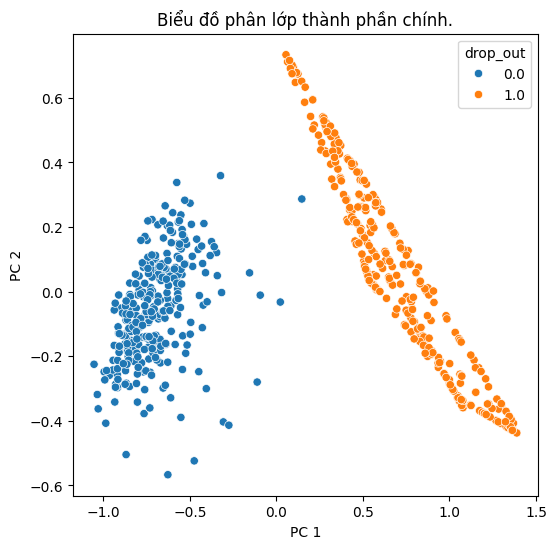

In [36]:
## Biểu diễn trực quan dữ liệu sau khi áp dụng PCA
df_pca['drop_out'] = df['drop_out']

plt.figure(figsize = (6, 6))
plt.title('Biểu đồ phân lớp thành phần chính.')
sns.scatterplot(x = PC_name[0], y = PC_name[1], data = df_pca, hue='drop_out')
plt.show()

In [37]:
# Dữ liệu phân bố thành 2 vùng:
# Vùng 1: dữ liệu tập trùng trong khoảng (4, 6) -> tập trung các điểm dữ liệu sinh viên còn học tiếp
# Vùng 2: dữ liệu phân bố đồ đều trong khoảng (5.5, 15) -> tập trung các điểm dữ liệu là sinh viên thôi học 
# -> Nếu x cao, y thấp -> sinh viên có khả năng thôi học.


In [38]:
df_pca

,PC 1,PC 2,student_id,drop_out
0,0.280660,0.518229,1900006098,1.0
1,1.078231,-0.359446,1900007549,1.0
2,-0.374949,0.154937,1900007763,0.0
3,-0.803221,-0.342022,1900007784,0.0
4,-0.486261,0.109476,1900008106,0.0
...,...,...,...,...
626,0.695037,0.050368,1941485790,1.0
627,0.090394,0.674862,2000001163,1.0
628,1.323727,-0.402874,2094368657,1.0
629,0.695668,-0.053565,2000002180,1.0


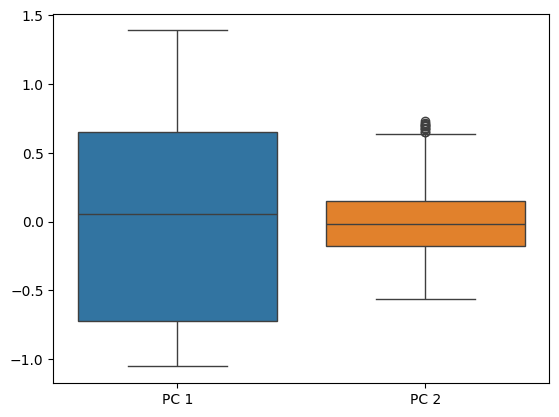

In [39]:
sns.boxplot(df_pca.iloc[:,[0,1]])
plt.show()

In [40]:
def calculate_iqr(df, col):
    Q1 = df[f'{col}'].quantile(0.25)
    Q2 = df[f'{col}'].quantile(0.50)
    Q3 = df[f'{col}'].quantile(0.75)
    return ((Q3-Q1),Q1, Q2, Q3) 

In [41]:
UW = calculate_iqr(df_pca, 'PC 2')[3] + 1.5*calculate_iqr(df_pca, 'PC 2')[0]
outlier = df_pca[df_pca['PC 2'] > UW].sort_values(by='PC 2')
df_pca.loc[outlier.index,'PC 2'] = df_pca['PC 2'].quantile(0.75)
df_pca

,PC 1,PC 2,student_id,drop_out
0,0.280660,0.518229,1900006098,1.0
1,1.078231,-0.359446,1900007549,1.0
2,-0.374949,0.154937,1900007763,0.0
3,-0.803221,-0.342022,1900007784,0.0
4,-0.486261,0.109476,1900008106,0.0
...,...,...,...,...
626,0.695037,0.050368,1941485790,1.0
627,0.090394,0.146795,2000001163,1.0
628,1.323727,-0.402874,2094368657,1.0
629,0.695668,-0.053565,2000002180,1.0


In [42]:
UW = calculate_iqr(df_pca, 'PC 1')[3] + 1.5*calculate_iqr(df_pca, 'PC 1')[0]
outlier = df_pca[df_pca['PC 1'] > UW].sort_values(by='PC 1')
df_pca.loc[outlier.index,'PC 1'] = df_pca['PC 1'].quantile(0.75)
df_pca

,PC 1,PC 2,student_id,drop_out
0,0.280660,0.518229,1900006098,1.0
1,1.078231,-0.359446,1900007549,1.0
2,-0.374949,0.154937,1900007763,0.0
3,-0.803221,-0.342022,1900007784,0.0
4,-0.486261,0.109476,1900008106,0.0
...,...,...,...,...
626,0.695037,0.050368,1941485790,1.0
627,0.090394,0.146795,2000001163,1.0
628,1.323727,-0.402874,2094368657,1.0
629,0.695668,-0.053565,2000002180,1.0


#### Tính độ lệch của phân phối dữ liệu.
+ Nếu dữ liệu có độ méo lệch bằng 0, đó có nghĩa là dữ liệu hoàn toàn đối xứng. 

+ Nếu độ méo lệch lớn hơn 0, dữ liệu lệch về phía bên trái của trục x (trái đối với phân phối Gaussian)

+ Nếu nhỏ hơn 0, dữ liệu lệch về phía bên phải của trục x.

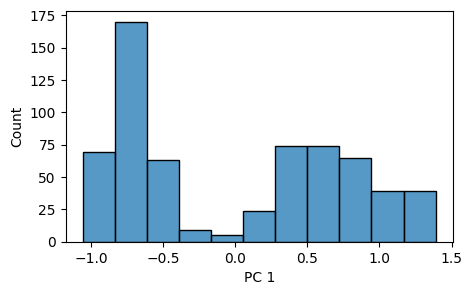

In [43]:
plt.figure(figsize = (5, 3))
sns.histplot(data = df_pca['PC 1'])
plt.show()

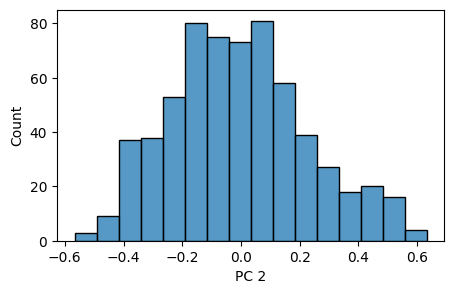

In [44]:
plt.figure(figsize = (5, 3))
sns.histplot(data = df_pca['PC 2'])
plt.show()

In [45]:
#  tính độ xiên của tần số

print(df_pca['PC 1'].mean(), df_pca['PC 1'].median())
print(df_pca['PC 2'].mean(), df_pca['PC 2'].median())

print('PC 1',df_pca['PC 1'].skew())
print('PC 2',df_pca['PC 2'].skew())

4.5042328732811424e-17 0.055332048210584815
-0.009446182155750034 -0.017357613871475795
PC 1 0.2279267722256419
PC 2 0.3293850042151853


In [46]:
# mean > median
# độ xiên > 0
# Có số lượng nhỏ ở PC 1 và PC 2 có khả năng tiếp tục học 
# 2 biểu đồ lệch dương  

In [47]:

mask = ~df['student_id'].isin(df_pca['student_id'])
# Loại bỏ các dòng có chỉ mục không nằm trong df_pca
df = df[~mask]
df


,student_id,gender,age,gpa1,gpa2,gpa3,gpa4,ar1,ar2,ar3,ar4,drop_out,student_id_
0,1900006098,1,23,1.300000,3.400000,1.300000,2.400000,34.500000,12.000000,0.000000,53.000000,1,0
1,1900007549,0,23,3.300000,0.400000,3.100000,2.700000,100.000000,48.000000,76.000000,90.000000,1,15
2,1900007763,1,23,7.000000,6.100000,3.800000,3.500000,0.000000,18.100000,2.300000,17.200000,0,16
3,1900007784,1,23,9.200000,9.400000,6.900000,7.500000,15.000000,2.200000,16.100000,8.900000,0,17
4,1900008106,1,23,4.700000,7.700000,3.100000,7.200000,7.700000,0.000000,19.100000,7.900000,0,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
626,1941485790,1,22,2.005193,2.943699,1.548892,1.943699,38.025966,20.503800,18.666878,40.348005,1,71
627,2000001163,0,22,2.835956,1.698504,1.845319,1.518726,58.584203,48.220907,58.670354,39.861349,1,177
628,2094368657,1,21,3.149262,0.967651,2.178926,0.729664,7.931526,6.685216,3.409387,23.768449,1,329
629,2000002180,0,22,2.427056,0.505833,1.970555,1.897084,95.562894,85.400561,92.294448,85.188334,1,194


In [48]:
df_pca.dtypes

PC 1          float64
PC 2          float64
student_id     object
drop_out      float64
dtype: object

In [49]:
df_pca.isnull().sum()

PC 1          0
PC 2          0
student_id    1
drop_out      1
dtype: int64

In [50]:
df_pca = df_pca.dropna(subset=['drop_out'])

## Chia tập dữ liệu

In [51]:
# X_train_pca, X_test_pca, y_train, y_test = train_test_split(df_pca, df['student_id'], test_size=0.2, stratify=df['drop_out'], random_state=42)
X_train_pca, X_test_pca, y_train, y_test = train_test_split(df_pca.loc[:, ['student_id','PC 1','PC 2']], df_pca['drop_out'], test_size=0.2, stratify=df_pca['drop_out'], random_state=42)

In [52]:
# X_train_pca = X_train_pca.reindex(columns = ['student_id', 'PC 1', 'PC 2', 'drop_out'])
# X_test_pca = X_test_pca.reindex(columns = ['student_id', 'PC 1', 'PC 2', 'drop_out'])
X_train_pca = X_train_pca.reindex(columns = ['student_id','PC 1', 'PC 2'])
X_test_pca = X_test_pca.reindex(columns = ['student_id','PC 1', 'PC 2'])


In [53]:
X_train_pca

,student_id,PC 1,PC 2
300,2200009837,-0.566956,-0.021240
587,1928102079,0.075844,0.146795
452,1934135626,1.024661,-0.307763
18,2000000740,-0.875994,-0.072391
347,1996665733,0.899914,-0.183802
...,...,...,...
479,2000001416,0.816784,-0.147057
142,2100009840,-0.709072,-0.046811
21,2000001008,-0.830840,-0.178977
517,1967137714,1.282078,-0.403131


In [54]:
X_test_pca

,student_id,PC 1,PC 2
361,2101000840,0.055332,0.146795
373,1908681570,0.280767,0.517795
352,2029775814,1.300387,-0.353088
491,2117481481,1.067614,-0.156032
282,2200008421,-0.721544,-0.258865
...,...,...,...
198,2200002333,-0.793579,0.048416
335,2000000487,0.565181,0.118646
53,2000003979,-0.671240,-0.182126
63,2000004490,-0.731462,-0.360016


In [55]:
y_train

300    0.0
587    1.0
452    1.0
18     0.0
347    1.0
      ... 
479    1.0
142    0.0
21     0.0
517    1.0
514    1.0
Name: drop_out, Length: 504, dtype: float64

In [56]:
y_test

361    1.0
373    1.0
352    1.0
491    1.0
282    0.0
      ... 
198    0.0
335    1.0
53     0.0
63     0.0
501    1.0
Name: drop_out, Length: 126, dtype: float64

In [57]:
X_train_pca.to_csv('../../data/train_test/xtrain_data.csv')
X_test_pca.to_csv('../../data/train_test/xtest_data.csv')
y_test.to_csv('../../data/train_test/ytest_data.csv')
y_train.to_csv('../../data/train_test/ytrain_data.csv')